### `Import the Main Libraries`

In [7]:
## Main Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## sklearn -- Embeded Datasets
from sklearn import datasets

### `Load the Dataset and Look at the big Picture`

In [8]:
## Load the MNIST Dataset --> using the embeded version of data in sklearn
## You can download it manually and read it as CSV file


In [9]:
## Check the keys of the Dataset


In [10]:
## Let's create a DF 
## I will do it in my preferable fast way


In [11]:
## check info


In [12]:
## convert to numerical values


### `Exploratory Data Analysis (EDA)`

In [13]:
## Let's check some instances 
## first instance  --> take only the Features not the target



In [14]:
## We want to get an instance for each unique target and plot it
## Read the code carefully --> trace it line by line, point by point



### `Normalizing the Dataset`

### `Split the Dataset`

In [15]:
## Split to Features and traget


In [16]:
## Standardize by dividing by 255 to be range (0 - 1) instead of (0 - 255)
## You can split first to train, test and then divide by 255, or do the opposite thing here --> the same here --> WHY ?



In [17]:
## First 60000 to train, and the other to test, for validation I will use cross validation


### `Using PCA`

In [ ]:
## Manually


In [18]:
## Using PCA, you can use it in pipeline 
## You can specify number you need for (n_component) < number of dimensons
## or you can specify (float_number), PCA will keep n_components which achieve variance > float_number (you entered)



In [19]:
## Keeping 0.95 varaince


In [20]:
## Plotting (Explained Variance) with the coressponding number of (Dimensions)


In [21]:
## Getting only the first two vectors after doing PCA


In [22]:
## Plotting


### `Reconstruction`

In [23]:
## Reconstruction the original features (it will cause some loss)


In [24]:
## The First Instance in original and reconstructed
## Plotting


-------

### `Incremental PCA`

In [25]:
## If the dataset is very big, we can use it incrementally (batches)


### `Sparse PCA`

In [26]:
## Using Sparse PCA, only on 10000 training Dataset, As it takes a lot of time in Runing


### `Kernel PCA`

In [27]:
## For Kernel PCA, Using kernel='rbf', with gamma, take it only for the first 10000 instances, As it takes a long time run


---

### `Singular Value Decomposition (SVD)`

In [22]:
## Use SVD for Dimensionality Reduction
svd = TruncatedSVD(n_components=150)
## fit and Transform train, transform for test
X_train_svd = svd.fit_transform(X_train.iloc[:10000, :])

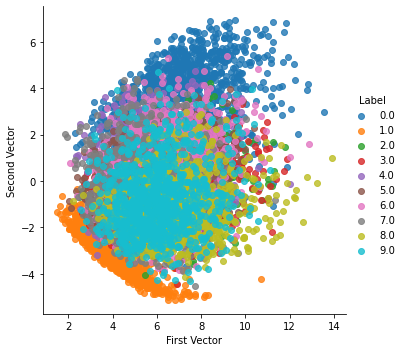

In [23]:
## Plotting the (First Vector & Second Vector) coressponding to each (label)
df_two_vectors_svd = pd.DataFrame(np.c_[X_train_svd[:, [0, 1]], y_train[:10000]], 
                                     columns=['First Vector', 'Second Vector', 'Label'])
## Plotting
sns.lmplot(x='First Vector', y='Second Vector', hue='Label', data=df_two_vectors_svd, fit_reg=False)
plt.show()

In [24]:
## Try to apply SVD using NumPy
u, s, vt = np.linalg.svd(X_train.iloc[:10000, :])

## Check shapes
print('u.shape -- ', u.shape)
print('s.shape -- ', s.shape)
print('vt.shape -- ', vt.shape)

u.shape --  (10000, 10000)
s.shape --  (784,)
vt.shape --  (784, 784)


In [25]:
## Making the s vector --> to be diagonal matrix 
ss = np.diag(s)

## Add the rest of the s matrix to be (1000, 784)
row = [0]*784
row = np.array(row).reshape(1, -1)

## Add zeros for the rest of these rows
for i in range(784, 10000):
  ss = np.vstack([ss, row])

## Check shapes
print('u.shape -- ', u.shape)
print('ss.shape -- ', ss.shape)
print('vt.shape -- ', vt.shape)

u.shape --  (10000, 10000)
ss.shape --  (10000, 784)
vt.shape --  (784, 784)


In [26]:
## Multiply the 3 Matrices again, but slicing the 150 component as I did above using TruncatedSVD using sklearn
A_new = u @ ss[:, :150] @ vt[:150, :150]

## Check the tolerance, allow some tolerance
## (X_train_svd) --- the output from sklearn
## (A_new)  ---- the output using NumPy - manually
np.allclose(X_train_svd, A_new, rtol=15, atol=15)  ## Give some tolerance

True

---

### `Random Projection`

#### `Gaussian Random Projection`

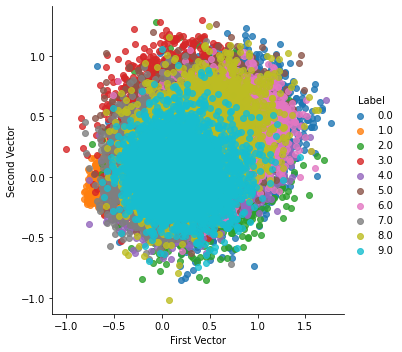

In [27]:
## Using Gaussian Random Projection
## For Gaussian random projection, we can either specify the number of components we would like to have in the reduced feature space, 
## Or we can set the hyperparameter eps. The smaller values generate a higher number of dimensions.
gauss_proj = GaussianRandomProjection(n_components='auto', eps=0.5, random_state=2018)

## fit and Transform train, transform for test
X_train_gauss = gauss_proj.fit_transform(X_train)

## Plotting the (First Vector & Second Vector) coressponding to each (label)
df_two_vectors_gauss = pd.DataFrame(np.c_[X_train_gauss[:, [0, 1]], y_train], 
                                    columns=['First Vector', 'Second Vector', 'Label'])
## Plotting
sns.lmplot(x='First Vector', y='Second Vector', hue='Label', data=df_two_vectors_gauss, fit_reg=False)
plt.show()

#### `Sparse Random Projection`

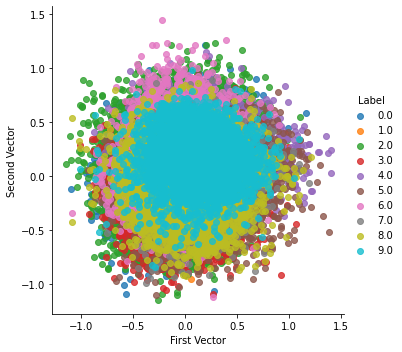

In [28]:
## Sparse Random Projection, is much faster and more efficient
## It retains some degree of sparsity in the transformed feature.
sparse_proj = SparseRandomProjection(n_components='auto', density='auto', eps=0.5)
## fit and Transform train, transform for test
X_train_sparse = sparse_proj.fit_transform(X_train)

## Plotting the (First Vector & Second Vector) coressponding to each (label)
df_two_vectors_sparse = pd.DataFrame(np.c_[X_train_sparse[:, [0, 1]], y_train], 
                                    columns=['First Vector', 'Second Vector', 'Label'])
## Plotting
sns.lmplot(x='First Vector', y='Second Vector', hue='Label', data=df_two_vectors_sparse, fit_reg=False)
plt.show()

-------------

### `Manifold Learning (nonlinear Dimensionality Reduction)`

### `Isomap`

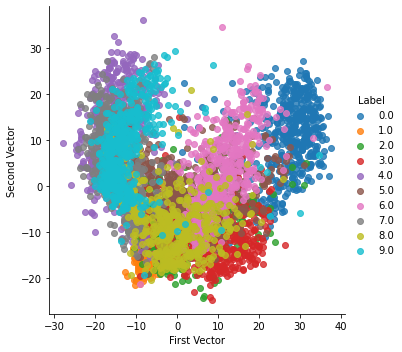

In [29]:
## isometric mapping (Isomap),  where distance is curved or geodesic distance rather than Euclidean distance
## It is very heavy in running
isomap = Isomap(n_neighbors=5, n_components=10, n_jobs=-1)

## fit and Transform train, transform for test
X_train_isomap = isomap.fit_transform(X_train.iloc[:5000, :]) ## take only the first 5000 instance

## Plotting the (First Vector & Second Vector) coressponding to each (label)
df_two_vectors_isomap = pd.DataFrame(np.c_[X_train_isomap[:, [0, 1]], y_train[:5000]], 
                                    columns=['First Vector', 'Second Vector', 'Label'])
## Plotting
sns.lmplot(x='First Vector', y='Second Vector', hue='Label', data=df_two_vectors_isomap, fit_reg=False)
plt.show()

### `Locally Linear Embedding`

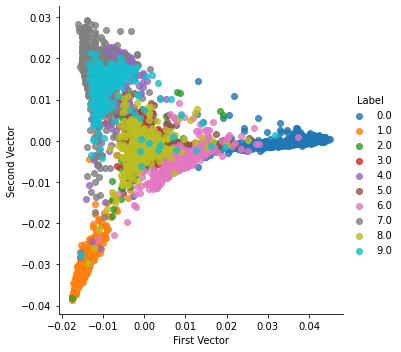

In [30]:
## Locally Linear Embedding is another popular nonlinear dimensionality reduction method
## LLE discovers the nonlinear structure in the original, high-dimensional data by segmenting the data into smaller components 
lle_reduction = LocallyLinearEmbedding(n_neighbors=10, n_components=2, n_jobs=-1, random_state=45, method='modified')

## fit and Transform train, transform for test
X_train_lle = lle_reduction.fit_transform(X_train.iloc[:5000, :]) ## take only the first 5000 instance

## Plotting the (First Vector & Second Vector) coressponding to each (label)
df_two_vectors_lle = pd.DataFrame(np.c_[X_train_lle[:, [0, 1]], y_train[:5000]], 
                                    columns=['First Vector', 'Second Vector', 'Label'])
## Plotting
sns.lmplot(x='First Vector', y='Second Vector', hue='Label', data=df_two_vectors_lle, fit_reg=False)
plt.show()

### `t-SNE`

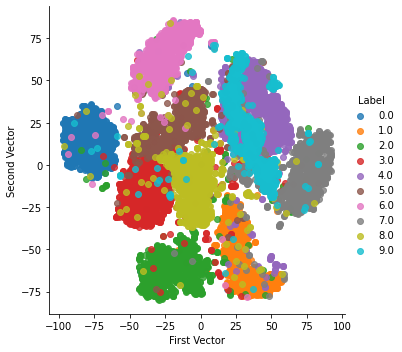

In [31]:
## t-SNE has a nonconvex cost function, 
## which means that different initializations of the algorithm will generate different results.

## (perplexity) -- is related to the number of nearest neighbors that is used in other manifold learning
tsne = TSNE(n_components=2, learning_rate=300, init='random', perplexity=30, random_state=45)

## fit and Transform train, transform for test
X_train_tsne = tsne.fit_transform(X_train.iloc[:10000, :]) ## take only the first 5000 instance

## Plotting the (First Vector & Second Vector) coressponding to each (label)
df_two_vectors_tsne = pd.DataFrame(np.c_[X_train_tsne[:, [0, 1]], y_train[:10000]], 
                                    columns=['First Vector', 'Second Vector', 'Label'])
## Plotting
sns.lmplot(x='First Vector', y='Second Vector', hue='Label', data=df_two_vectors_tsne, fit_reg=False)
plt.show()

------